In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
from datetime import datetime

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
results = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/experiment_1_2_results.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/experiment_1_logs.csv', error_bad_lines=False)
data = data.drop(columns=data.columns[17:])
data = data[['timeStamp','elapsed','label','success']]
subset = data[['timeStamp','elapsed']].apply(pd.to_numeric, errors='coerce').dropna()
subset['label'] = data[['label']]
subset['timeStamp'] = (subset['timeStamp']*1000000).astype(np.int64)
subset['toDate'] = pd.to_datetime(subset['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
subset['datetime'] = subset['toDate']
subset = subset.set_index('toDate')
subset = subset[subset.index.notna()]
subset = subset.loc['2022', ["elapsed","label","datetime"]]
subset = subset[~(subset['elapsed'] >= 17500)]
subset = subset.loc[subset.elapsed.isin(subset.elapsed.nlargest(n=78451))]
subset['func_counts'] = subset['label'].map(subset['label'].value_counts())
subset = subset.loc[subset['func_counts'].isin(subset['func_counts'].nlargest(n=1).tolist())]
subset = subset[20000:20000+len(results)]
subset['counter'] = range(1,len(subset)+1)
subset = subset.set_index('counter')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
subset.elapsed.describe()

count     9577.000000
mean      2711.349614
std       1625.782848
min        650.250000
25%       1455.750000
50%       2696.250000
75%       3556.500000
max      11374.500000
Name: elapsed, dtype: float64

In [39]:
results.elapsed.describe()

count    2527.000000
mean     2134.195093
std      1454.516457
min       260.000000
25%      1155.000000
50%      1268.000000
75%      3730.000000
max      7125.000000
Name: elapsed, dtype: float64

Text(0, 0.5, 'Execution time (ms)')

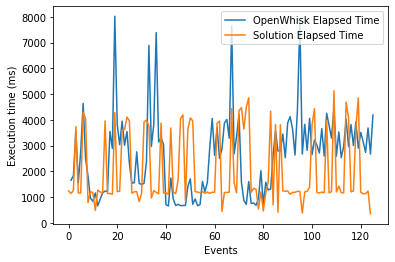

In [40]:
#subset['mean'] = subset['elapsed'].mean()
#subset['std'] = subset['elapsed'].std()
#results['mean'] = results['elapsed'].mean()
#results['std'] = results['elapsed'].std()

#plt.plot(subset['mean'][:100],label="OpenWhisk Mean Time")
#plt.plot(subset['std'][:100],label="OpenWhisk Std Time")
#plt.plot(results['mean'][:100],label="Solution Mean Time")
#plt.plot(results['std'][:100],label="Solution Std Time")

plt.plot(subset['elapsed'][:125],label="OpenWhisk Elapsed Time")
plt.plot(results['elapsed'][:125],label="Solution Elapsed Time")
plt.legend(loc="upper right")
plt.xlabel('Events')
plt.ylabel('Execution time (ms)')

In [41]:
def interQuartile(df_):
  for x in ['Openwhisk']:
      q75,q25 = np.percentile(df_.loc[:,x],[75,25])
      intr_qr = q75-q25
  
      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)
  
      df_.loc[df_[x] < min,x] = np.nan
      df_.loc[df_[x] > max,x] = np.nan

  df_ = df_.dropna(axis = 0)
  df_.isnull().sum()
  return df_

Openwhisk Mean: 2711.3496136577214
Openwhisk Std: 1625.7828479590994
Solution Mean: 2134.195092995647
Solution Std: 1454.5164565092402


Text(0, 0.5, 'Execution time (ms)')

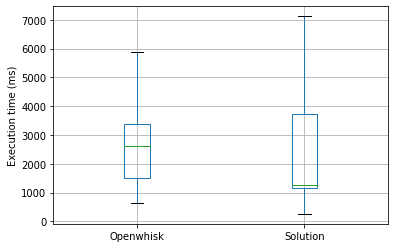

In [42]:
print("Openwhisk Mean: "+str(subset['elapsed'].mean()))
print("Openwhisk Std: "+str(subset['elapsed'].std()))
print("Solution Mean: "+str(results['elapsed'].mean()))
print("Solution Std: "+str(results['elapsed'].std()))
box = pd.DataFrame({"Openwhisk":subset['elapsed'],"Solution":results['elapsed']})
box = interQuartile(box)
box = interQuartile(box)
box = interQuartile(box)
box.boxplot(['Openwhisk','Solution'])
plt.ylabel('Execution time (ms)')